<a href="https://colab.research.google.com/github/innsvi/python_for_ds_task/blob/main/HW_16_2_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B8%D0%B7%D0%B8%D0%BA%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [1]:
# ЗАВДАННЯ 1.1: Завантажте дані з файлу credit_risk_dataset.csv

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score
)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/credit_risk_dataset.csv')

In [7]:
# ЗАВДАННЯ 1.2: Виведіть розмір датасету

df.shape

(32581, 12)

In [8]:
# ЗАВДАННЯ 1.3: Покажіть перші 5 рядків

df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
# ЗАВДАННЯ 1.4: Виведіть загальну інформацію про дані (кількість записів, типи колонок)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
# ЗАВДАННЯ 1.5: Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

df["loan_status"].value_counts(normalize=True) * 100

,proportion
loan_status,
0,78.183604
1,21.816396


**ЗАВДАННЯ 1.6: Дайте висновок, це задача збалансованої чи незбалансованої класифікації**.

*Виходить, що розподіл цільової змінної є незбалансованим: 78.18% спостережень належать до класу 0 та 21.82%  до класу 1. Це означає, що під час оцінки моделі потрібно звертати увагу не лише на accuracy, а й на precision, recall та F1-score.*


---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


In [11]:
# ЗАВДАННЯ 2.1: Обчисліть відсоток пропущених значень в колонках.
# За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.

missing_percent = df.isna().mean() * 100
missing_percent.sort_values(ascending=False)

,0
loan_int_rate,9.563856
person_emp_length,2.747000
person_income,0.000000
person_age,0.000000
person_home_ownership,0.000000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_status,0.000000
loan_percent_income,0.000000


In [12]:
# заповнення медіаною для числових колонок
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].median())
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].median())


In [13]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [14]:
# ЗАВДАННЯ 2.2: # ЗАВДАННЯ 1.5:Проаналізуйте розподіл числових змінних.

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,32581.0,4.767994,4.087372,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,32581.0,11.009620,3.081611,5.42,8.49,10.99,13.11,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


У змінних person_age, person_income та person_emp_length спостерігаються екстремальні значення, що можуть бути викидами. Особливо аномальними виглядають значення 144 років та 123 років трудового стажу. Змінна person_income має сильний правосторонній перекіс через дуже великі доходи.

In [16]:
# ЗАВДАННЯ 2.3: Знайдіть та обробіть викиди в колонці person_income з допомогою Interquartile range.

col = "person_income"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

(np.float64(38500.0),
 np.float64(79200.0),
 np.float64(40700.0),
 np.float64(-22550.0),
 np.float64(140250.0))

In [17]:
outliers = df[df["person_income"] > upper_bound]
len(outliers)

1484

In [18]:
# обріжемо викиди ( не вттдаляємо, бо видалення 4.5% викидів може сильно повпливати на модель)

df["person_income"] = df["person_income"].clip(upper=upper_bound)

In [19]:
df["person_income"].describe()

,person_income
count,32581.000000
mean,62419.212793
std,31810.265995
min,4000.000000
25%,38500.000000
50%,55000.000000
75%,79200.000000
max,140250.000000


In [20]:
# ЗАВДАННЯ 2.4: Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.

cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [21]:
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

 loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

 loan_grade
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

 cb_person_default_on_file
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [22]:
for col in cat_cols:
    print("\n", col)
    print(df.groupby(col)["loan_status"].mean().sort_values(ascending=False))


 person_home_ownership
person_home_ownership
RENT        0.315700
OTHER       0.308411
MORTGAGE    0.125707
OWN         0.074690
Name: loan_status, dtype: float64

 loan_intent
loan_intent
DEBTCONSOLIDATION    0.285879
MEDICAL              0.267007
HOMEIMPROVEMENT      0.261026
PERSONAL             0.198877
EDUCATION            0.172168
VENTURE              0.148103
Name: loan_status, dtype: float64

 loan_grade
loan_grade
G    0.984375
F    0.705394
E    0.644191
D    0.590458
C    0.207340
B    0.162760
A    0.099564
Name: loan_status, dtype: float64

 cb_person_default_on_file
cb_person_default_on_file
Y    0.378068
N    0.183932
Name: loan_status, dtype: float64


Аналіз категоріальних змінних показав, що найбільш сильний вплив на ймовірність дефолту мають змінні loan_grade та наявність попереднього дефолту (cb_person_default_on_file). Також вищий ризик спостерігається серед орендарів житла та кредитів на консолідацію боргу. Отримані результати свідчать про наявність чітких закономірностей між категоріальними характеристиками клієнтів та кредитним ризиком.

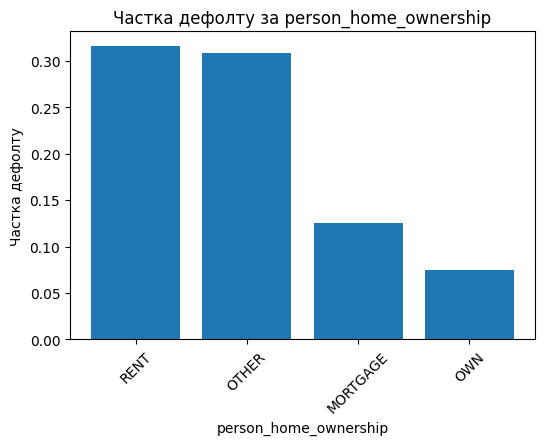

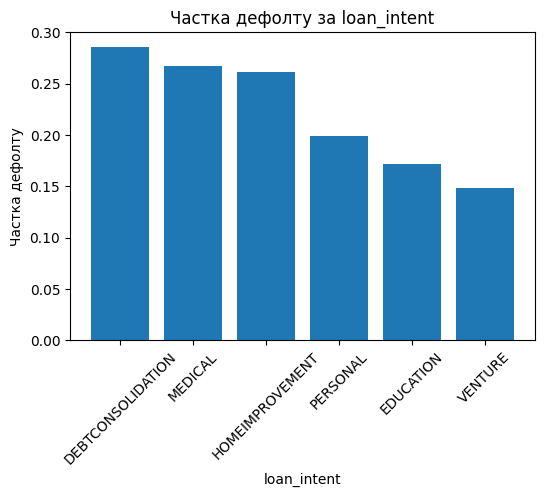

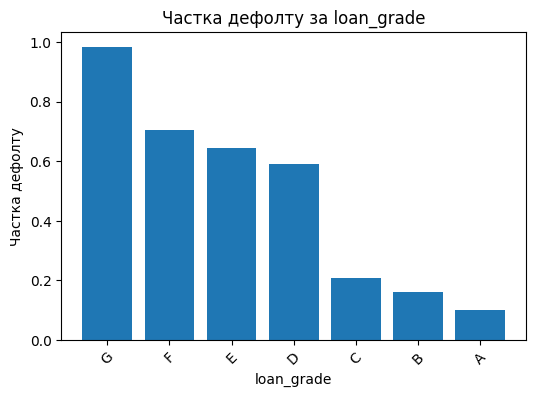

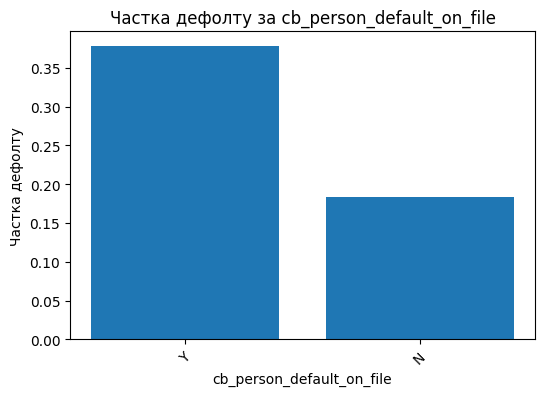

In [23]:
# ЗАВДАННЯ 2.5: Візуалізуйте взаємозв'язок ознак з цільовою змінною.

import matplotlib.pyplot as plt

for col in cat_cols:
    rate = df.groupby(col)["loan_status"].mean().sort_values(ascending=False)

    plt.figure(figsize=(6,4))
    plt.bar(rate.index.astype(str), rate.values)
    plt.title(f"Частка дефолту за {col}")
    plt.xlabel(col)
    plt.ylabel("Частка дефолту")
    plt.xticks(rotation=45)
    plt.show()

*Візуалізації показують чіткий взаємозв’язок між категоріальними ознаками та кредитним ризиком. Найбільш інформативною ознакою є loan_grade. Також значущий вплив мають історія дефолту та тип володіння житлом. Отримані закономірності підтверджують доцільність використання цих ознак у моделі логістичної регресії.*

<Figure size 600x400 with 0 Axes>

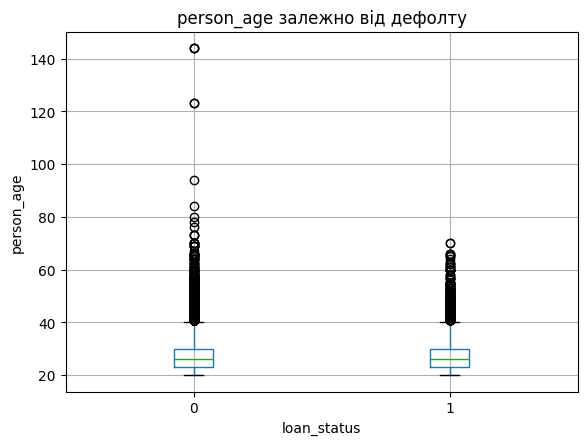

<Figure size 600x400 with 0 Axes>

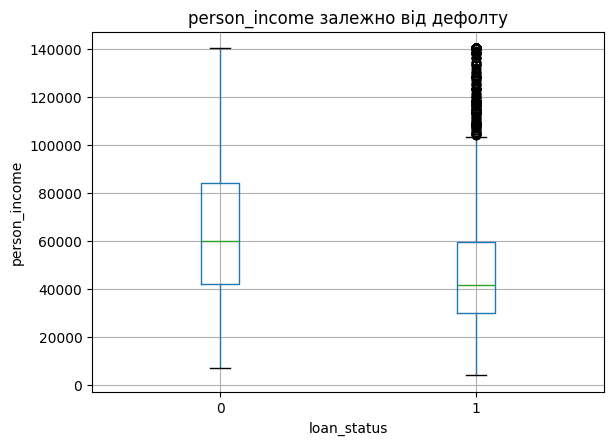

<Figure size 600x400 with 0 Axes>

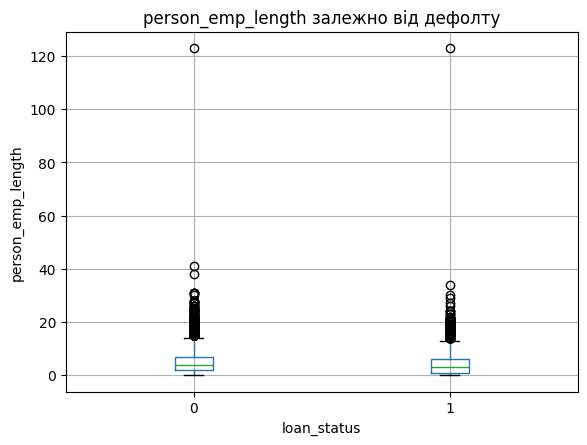

<Figure size 600x400 with 0 Axes>

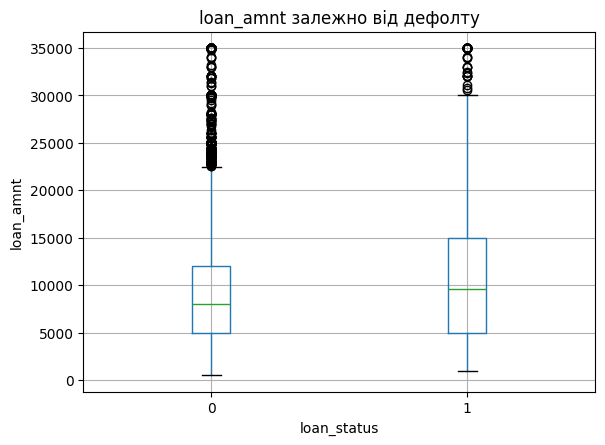

<Figure size 600x400 with 0 Axes>

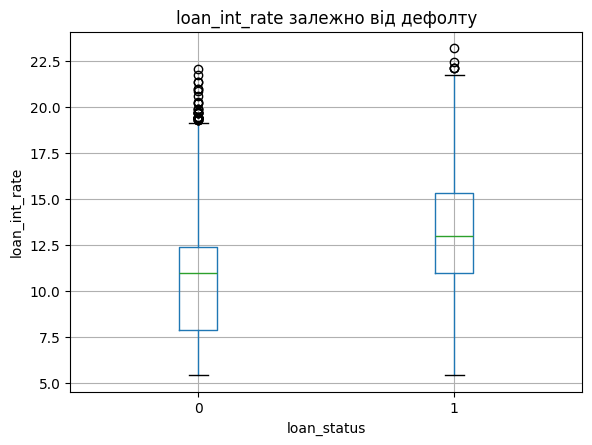

<Figure size 600x400 with 0 Axes>

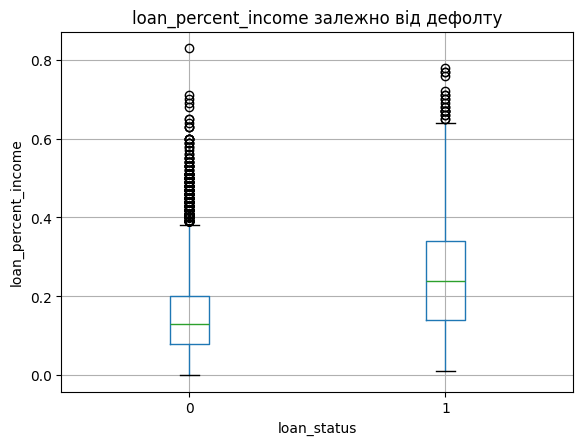

<Figure size 600x400 with 0 Axes>

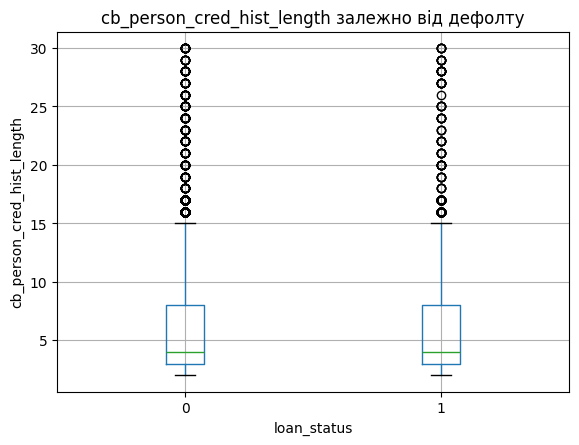

In [24]:
num_cols_no_target = [col for col in num_cols if col != "loan_status"]

for col in num_cols_no_target:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by="loan_status")
    plt.title(f"{col} залежно від дефолту")
    plt.suptitle("")
    plt.xlabel("loan_status")
    plt.ylabel(col)
    plt.show()

*Наші boxplot-графіки показують, що найбільш помітна різниця між клієнтами з дефолтом і без дефолту спостерігається для змінних person_income, loan_int_rate та loan_percent_income. Клієнти з дефолтом мають суттєво нижчий рівень доходу, вищі процентні ставки та більшу частку доходу, що спрямовується на обслуговування кредиту. Також спостерігається дещо більша сума кредиту серед дефолтних клієнтів, однак цей ефект менш виражений. Водночас змінні person_age, person_emp_length та cb_person_cred_hist_length не демонструють суттєвих відмінностей між класами, що свідчить про їх слабший вплив на кредитний ризик.*


---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



In [25]:
# ЗАВДАННЯ 3.1: Побудуйте матрицю кореляцій для числових змінних.

corr_matrix = df[num_cols].corr()
corr_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.117981,0.161454,0.050787,0.011853,-0.021629,-0.042411,0.859133
person_income,0.117981,1.000000,0.198751,0.420091,-0.017050,-0.245934,-0.367245,0.093901
person_emp_length,0.161454,0.198751,1.000000,0.113851,-0.051262,-0.082182,-0.054134,0.143069
loan_amnt,0.050787,0.420091,0.113851,1.000000,0.139483,0.105376,0.572612,0.041967
loan_int_rate,0.011853,-0.017050,-0.051262,0.139483,1.000000,0.319360,0.114514,0.015762
loan_status,-0.021629,-0.245934,-0.082182,0.105376,0.319360,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.367245,-0.054134,0.572612,0.114514,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.093901,0.143069,0.041967,0.015762,-0.015529,-0.031690,1.000000


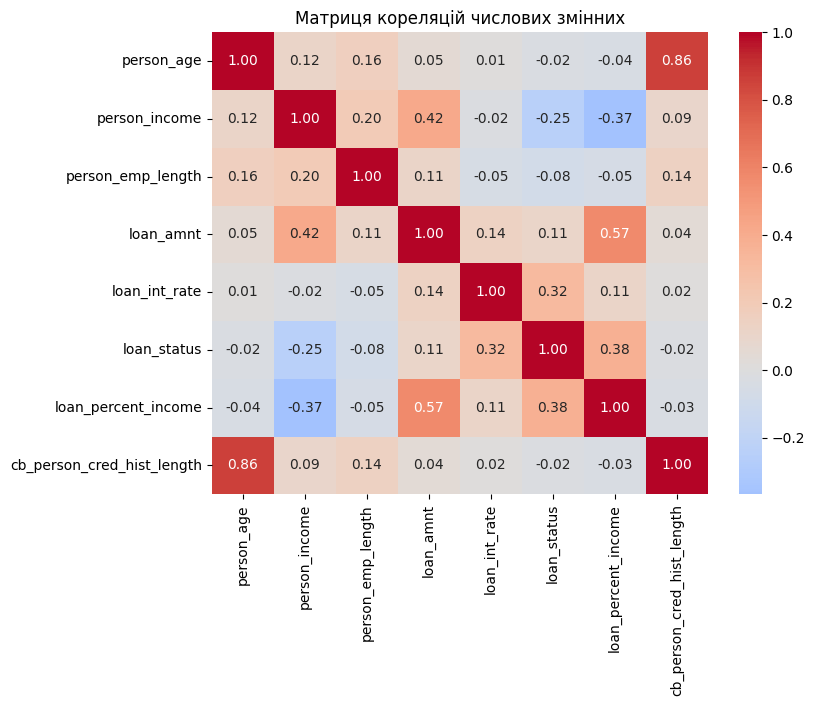

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0)

plt.title("Матриця кореляцій числових змінних")
plt.show()

*По матриці кореляції бачимо, що найбільш пов’язаними з кредитним ризиком є змінні loan_percent_income (0.38) та loan_int_rate (0.32), що свідчить про суттєвий вплив фінансового навантаження та процентної ставки на ймовірність дефолту. Негативна кореляція з person_income (-0.25) підтверджує, що нижчий дохід пов’язаний з вищим ризиком. Водночас спостерігається висока кореляція між person_age та cb_person_cred_hist_length (0.86), що може створювати проблему мультиколінеарності при побудові моделі*.

In [28]:
# ЗАВДАННЯ 3.2: Закодуйте категоріальні змінні.

df_encoded = pd.get_dummies(df,
                            columns=cat_cols,
                            drop_first=True)

In [29]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


In [30]:
df_encoded.shape

(32581, 23)

In [31]:
# ЗАВДАННЯ 3.3: Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.

X = df_encoded.drop(["loan_status", "cb_person_cred_hist_length"], axis=1)
y = df_encoded["loan_status"]

print(X.shape)

(32581, 21)


Для побудови моделі ми залишемо всі числові та закодовані категоріальні змінні, за винятком cb_person_cred_hist_length через високу кореляцію з person_age (0.86), що може спричинити мультиколінеарність. Оскільки обидві змінні мають слабкий зв’язок з цільовою змінною, було прийнято рішення залишити лише одну з них.


---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



In [32]:
# ЗАВДАННЯ 4.1: Розділіть дані на X та y

X = df_encoded.drop(["loan_status", "cb_person_cred_hist_length"], axis=1)
y = df_encoded["loan_status"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (32581, 21)
y shape: (32581,)


In [33]:
# ЗАВДАННЯ 4.2: Поділіть на навчальну та тестову вибірки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% — тест
    random_state=42,     # фіксуємо для відтворюваності
    stratify=y           # зберігаємо баланс класів
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (26064, 21)
X_test: (6517, 21)
y_train: (26064,)
y_test: (6517,)


In [34]:
# ЗАВДАННЯ 4.3: Застосуйте масштабування

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit тільки на train
X_train_scaled = scaler.fit_transform(X_train)

# transform test
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(26064, 21)
(6517, 21)


In [35]:
# ЗАВДАННЯ 4.4: Навчіть модель логістичної регресії

from sklearn.linear_model import LogisticRegression

# створюємо модель
log_reg = LogisticRegression(max_iter=2000)

# навчаємо на масштабованих даних
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [38]:
# ЗАВДАННЯ 4.5: Зробіть прогнози на тренувальній та тестовій вибірках.

# Прогноз класів
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

In [39]:
# Ймовірність класу 1 (дефолт)
y_train_proba = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [40]:
print("Train predictions:", y_train_pred.shape)
print("Test predictions:", y_test_pred.shape)

Train predictions: (26064,)
Test predictions: (6517,)



---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


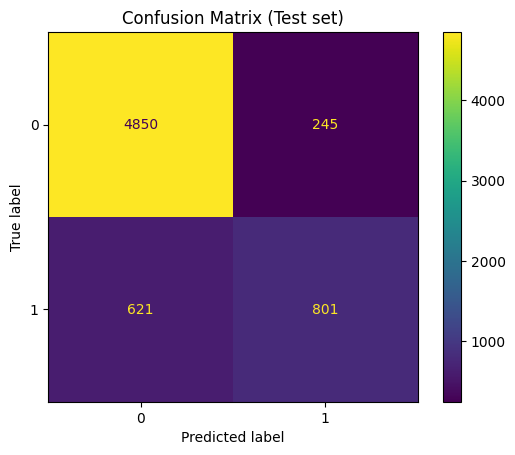

array([[4850,  245],
       [ 621,  801]])

In [41]:
# ЗАВДАННЯ 5.1: Побудуйте confusion matrix.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# обчислюємо
cm = confusion_matrix(y_test, y_test_pred)

# відображаємо
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Test set)")
plt.show()

cm

*Модель добре розпізнає безпечних клієнтів, але пропускає близько 44% дефолтів*

In [42]:
# ЗАВДАННЯ 5.2: Обчисліть основні метрики (accuracy, precision, recall, f1).

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1, 4))

Accuracy: 0.8671
Precision: 0.7658
Recall: 0.5633
F1-score: 0.6491


*Побудована модель логістичної регресії демонструє високу загальну точність (86.7%) та добрий показник precision (76.6%), що свідчить про відносно низьку кількість хибних спрацьовувань. Однак recall складає лише 56.3%, що означає, що модель пропускає значну частину клієнтів з дефолтом*.

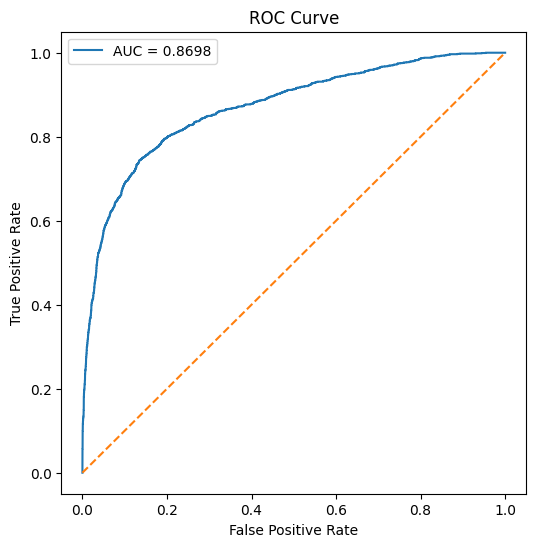

AUC: 0.8698


In [43]:
# ЗАВДАННЯ 5.3: Побудуйте ROC-криву та обчисліть AUC

from sklearn.metrics import roc_curve, roc_auc_score

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# AUC
auc_score = roc_auc_score(y_test, y_test_proba)

# графік
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], linestyle="--")  # лінія випадкової моделі
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC:", round(auc_score, 4))

Якщо випадково взяти одного дефолтного клієнта і одного без дефолту,
модель у 87% випадків поставить вищу ймовірність дефолту правильному клієнту

In [44]:
# ЗАВДАННЯ 5.4: Проаналізуйте важливість ознак.

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})

# сортуємо
coefficients["Abs_Coefficient"] = np.abs(coefficients["Coefficient"])
coefficients = coefficients.sort_values("Abs_Coefficient", ascending=False)

coefficients.head(10)


,Feature,Coefficient,Abs_Coefficient
5,loan_percent_income,1.254595,1.254595
16,loan_grade_D,0.822259,0.822259
17,loan_grade_E,0.481811,0.481811
3,loan_amnt,-0.467730,0.467730
7,person_home_ownership_OWN,-0.444668,0.444668
8,person_home_ownership_RENT,0.420950,0.420950
13,loan_intent_VENTURE,-0.411272,0.411272
9,loan_intent_EDUCATION,-0.319466,0.319466
18,loan_grade_F,0.282627,0.282627
19,loan_grade_G,0.273817,0.273817


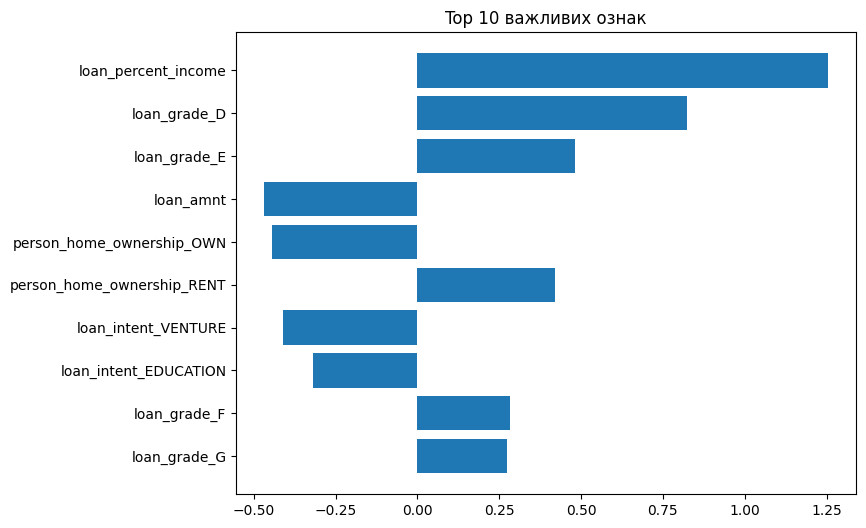

In [45]:
top_features = coefficients.head(10)

plt.figure(figsize=(8,6))
plt.barh(top_features["Feature"], top_features["Coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 10 важливих ознак")
plt.show()

**ЗАВДАННЯ 5.5: Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз**.

*Accuracy становить 0.8671, що свідчить про правильну класифікацію приблизно 87% спостережень. Значення AUC = 0.8698 підтверджує хорошу здатність моделі розділяти дефолтні та недефолтні кредити. Precision (0.7658) показує, що більшість передбачених дефолтів є справжніми, проте Recall (0.5633) вказує, що модель пропускає частину реальних дефолтів. F1-score (0.6491) демонструє середній баланс між точністю та повнотою. Отже, модель добре працює в цілому, але її можна покращити для кращого виявлення проблемних позичальників*.

*Найбільший вплив на прогноз мають ознаки loan_percent_income (частка кредиту від доходу), категорії кредитного рейтингу (loan_grade_D, loan_grade_E, loan_grade_F, loan_grade_G), а також тип володіння житлом (person_home_ownership_RENT, person_home_ownership_OWN). Висока частка кредиту від доходу та нижчі кредитні рейтинги суттєво підвищують ризик дефолту. Таким чином, модель спирається на економічно логічні та фінансово обґрунтовані фактори ризику*.


---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.



In [48]:
# ЗАВДАННЯ 6.1: Проаналізуйте метрики precision, recall,
# F1 при різних порогах класифікації (мінімум - 5 різних порогів).
# Візуалізуйте як змінюються метрики якості при зміні порогу.

y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)

    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)

    results.append([t, precision, recall, f1])

df_metrics = pd.DataFrame(results,
                          columns=["Threshold", "Precision", "Recall", "F1"])

df_metrics


,Threshold,Precision,Recall,F1
0,0.2,0.524643,0.800985,0.634011
1,0.3,0.622699,0.713783,0.665138
2,0.4,0.697409,0.643460,0.669349
3,0.5,0.765774,0.563291,0.649109
4,0.6,0.808354,0.462729,0.588551
5,0.7,0.853041,0.355134,0.501490


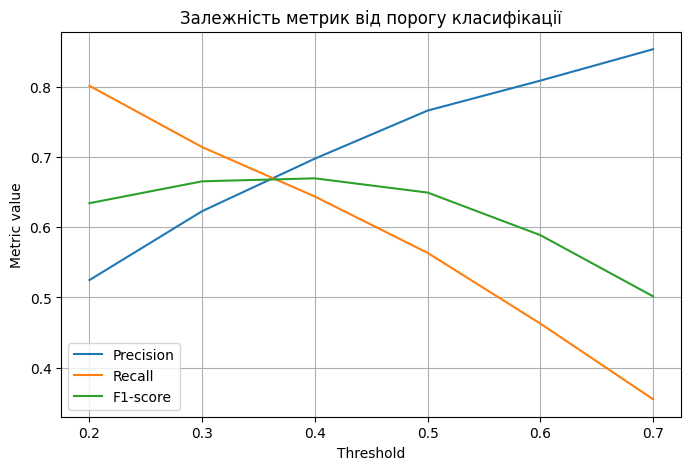

In [50]:
plt.figure(figsize=(8,5))

plt.plot(df_metrics["Threshold"], df_metrics["Precision"], label="Precision")
plt.plot(df_metrics["Threshold"], df_metrics["Recall"], label="Recall")
plt.plot(df_metrics["Threshold"], df_metrics["F1"], label="F1-score")

plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.title("Залежність метрик від порогу класифікації")
plt.legend()
plt.grid(True)

plt.show()

Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.


**Видно чітку закономірність**:

При низькому порозі (0.2)
- Recall дуже високий (≈ 0.80)
- Precision низький (≈ 0.52)
- Модель знаходить майже всіх дефолтних клієнтів, але робить багато хибних спрацювань.

При зростанні порогу (0.3–0.4)
- Precision зростає
- Recall поступово зменшується
- F1-score досягає максимуму при порозі 0.4 (≈ 0.67)

При високих порогах (0.6–0.7)
- Precision дуже високий (≈ 0.85)
- Recall сильно падає (≈ 0.35)
- Модель майже не помиляється, коли каже “дефолт”, але пропускає багато реальних дефолтів.


**У кредитному скорингу**:
- пропустити дефолтного клієнта (FN) = прямі фінансові втрати
- відмовити хорошому клієнту (FP) = втрата прибутку, але не прямий збиток

Поріг 0.5 (стандартний)
- Recall лише 0.56 — ми пропускаємо 44% дефолтів.
- Для банку це занадто ризиковано.

Поріг 0.2
- Recall 0.80 — дуже добре
- Але precision 0.52 — половина відмов буде помилковими.
- Банк втратить багато хороших клієнтів.

Поріг 0.3
- Precision ≈ 0.62
- Recall ≈ 0.71
- F1 ≈ 0.67
*Тут ми знаходимо 71% дефолтів при цьому не "відсікаємо" надто багато хороших клієнтів*

**Для бізнес-задачі кредитного скорингу оптимальним є поріг класифікації 0.3. При цьому значенні модель досягає recall ≈ 0.71, що дозволяє виявляти більшість потенційних дефолтів, зберігаючи прийнятний рівень precision ≈ 0.62. Оскільки помилка пропуску дефолтного клієнта є фінансово більш критичною, ніж помилкова відмова благонадійному клієнту, зниження порогу до 0.3 є обґрунтованим з точки зору управління ризиком**.


---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.


In [51]:
# спробуємо навчання Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# модель
dt = DecisionTreeClassifier(random_state=42)

# навчаємо
dt.fit(X_train, y_train)

# прогнози
y_pred_dt = dt.predict(X_test)

# метрики
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.8895197176615007
Precision: 0.7381275440976933
Recall: 0.7651195499296765
F1-score: 0.7513812154696132


In [52]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9335583857603191
Precision: 0.96171802054155
Recall: 0.7243319268635724
F1-score: 0.8263136782992379


Бачимо, що:

Logistic Regression
- найгірший recall
- пропускає багато дефолтів
- найслабший F1

Decision Tree
- найвищий recall (0.765)
- добре ловить дефолтників
- але precision нижчий
- може бути схильна до перенавчання

Random Forest
- найвищий Accuracy
- дуже високий Precision (0.96)
- найвищий F1 (0.826)
- хзбалансована якість
- Найкраща загальна модель

*RandomForestClassifier продемонстрував найкращу якість на тестовій вибірці. Модель досягла найвищих значень accuracy (0.93) та F1-score (0.83), що свідчить про збалансованість між precision та recall. DecisionTreeClassifier показав високий recall (0.77), однак поступається Random Forest за загальною якістю. Логістична регресія продемонструвала найнижчі результати. Таким чином, для задачі кредитного скорингу найбільш доцільною є модель Random Forest*.